Imports

In [109]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.neural_network as nn

Carregamento do CSV

In [110]:
array = pd.read_csv("./arquivos-IA/BolsaFamilia.csv")
X = pd.get_dummies(array.loc[:, :'Renda'])
y = pd.Categorical(array.Bolsa).codes
scaler = sk.preprocessing.StandardScaler().fit(X)

Pre-processamento

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=13)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Ajuste e Validação do Modelo

In [153]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(30,20,10), activation='identity', solver='sgd', max_iter=300, alpha=0.001)
scores = cross_val_score(mlp, X_train, y_train, cv=10, scoring='f1')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), 2*scores.std()))

Accuracy: 0.81 (+/- 0.20)


Teste e Pontuação do modelo

In [158]:
mlpFit = mlp.fit(X_train, y_train)
mlpFit.score(X_test, y_test)

0.8333333333333334

Curva ROC

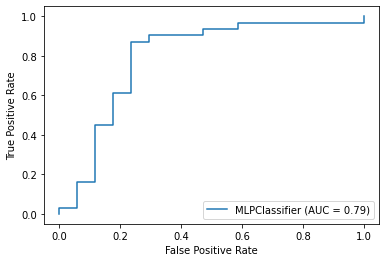

In [156]:
sk.metrics.plot_roc_curve(mlpFit, X_test, y_test)